#**Modelagem dos dados e leitura de estatísticas descritivas**

##1. Pré-processamento de dados

In [121]:
#importar bibliotecas e ler dataframe

#bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ler arquivo e definir dataframe

pokedex = pd.read_csv('drive/MyDrive/Datasets/pokedex.csv')

#retornar  output com as 5 primeiras e ultimas linhas do dataframe
display(pokedex.head())
display(pokedex.tail())

,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0


,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
796,797,Celesteela,101,103,9.2,97,NaN,107,101,61,steel,999.9,7,1
797,798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,1
798,799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1
799,800,Necrozma,107,101,2.4,97,NaN,127,89,79,psychic,230.0,7,1
800,801,Magearna,95,115,1.0,80,NaN,130,115,65,steel,80.5,7,1


In [122]:
#verifica os tipos das colunas
pokedex.dtypes

pokedex_number       int64
name                object
attack               int64
defense              int64
height_m           float64
hp                   int64
percentage_male    float64
sp_attack            int64
sp_defense           int64
speed                int64
type                object
weight_kg          float64
generation           int64
is_legendary         int64
dtype: object

In [123]:
#altera a coluna "is_legendary" para booleano
pokedex["is_legendary"] = pokedex["is_legendary"].astype("bool")

#retorna os tipos de dados de cada coluna pós alteração
pokedex.dtypes

pokedex_number       int64
name                object
attack               int64
defense              int64
height_m           float64
hp                   int64
percentage_male    float64
sp_attack            int64
sp_defense           int64
speed                int64
type                object
weight_kg          float64
generation           int64
is_legendary          bool
dtype: object

In [124]:
#Cria coluna com o nome das regiões por geração respectivamente
regiões = {1:"Kanto", 2:'Johto',3:"Hoenn", 4:"Sinnoh", 5:"Unova", 6:'Kalos', 7:"Sevii Islands"}

pokedex["region"] = pokedex['generation'].apply(lambda x:regiões[x])

pokedex.head()

,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary,region
0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,False,Kanto
1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,False,Kanto
2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,False,Kanto
3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,False,Kanto
4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,False,Kanto


In [125]:
#informações de cada coluna

pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   801 non-null    int64  
 1   name             801 non-null    object 
 2   attack           801 non-null    int64  
 3   defense          801 non-null    int64  
 4   height_m         781 non-null    float64
 5   hp               801 non-null    int64  
 6   percentage_male  703 non-null    float64
 7   sp_attack        801 non-null    int64  
 8   sp_defense       801 non-null    int64  
 9   speed            801 non-null    int64  
 10  type             801 non-null    object 
 11  weight_kg        781 non-null    float64
 12  generation       801 non-null    int64  
 13  is_legendary     801 non-null    bool   
 14  region           801 non-null    object 
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 88.5+ KB


In [126]:
#cria função que atribui uma cor para cada tipo de pokemon
def color_type(value):
    if value.lower() == 'grass':
        return 'background-color: #7cfc00'
    elif value.lower() == 'fire':
        return 'background-color: #ff0000'
    elif value.lower() == 'water':
        return 'background-color: #248eff'
    elif value.lower() == 'bug':
        return 'background-color: #c6ce00'
    elif value.lower() == 'normal':
        return 'background-color: #e6d690'
    elif value.lower() == 'poison':
        return 'background-color: #993399'
    elif value.lower() == 'electric':
        return 'background-color: #ffff00'
    elif value.lower() == 'ground':
        return 'background-color: #8b4513'
    elif value.lower() == 'fairy':
        return 'background-color: #ff0080'
    elif value.lower() == 'fighting':
        return 'background-color: #cc0002'
    elif value.lower() == 'psychic':
        return 'background-color: #db244f'
    elif value.lower() == 'rock':
        return 'background-color: #964b00'
    elif value.lower() == 'ghost':
        return 'background-color: #b34db2'
    elif value.lower() == 'ice':
        return 'background-color: #d1ebf7'
    elif value.lower() == 'dragon':
        return 'background-color: #ff8c00'
    elif value.lower() == 'dark':
        return 'background-color: #3d2b1f'
    elif value.lower() == 'steel':
        return 'background-color: #b0c4de'
    elif value.lower() == 'flying':
        return 'background-color: #809bbf'
    else:
        return ''


In [127]:
#aplica a função na coluna type (formatação condicional)
styled_pokedex = pokedex[['name', 'type']].head(15).style.applymap(color_type, subset=['type'])

styled_pokedex

,name,type
0,Bulbasaur,grass
1,Ivysaur,grass
2,Venusaur,grass
3,Charmander,fire
4,Charmeleon,fire
5,Charizard,fire
6,Squirtle,water
7,Wartortle,water
8,Blastoise,water
9,Caterpie,bug


## 2. Tratamento de missing

In [128]:
#verificar quais colunas possuem valores nulos
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   801 non-null    int64  
 1   name             801 non-null    object 
 2   attack           801 non-null    int64  
 3   defense          801 non-null    int64  
 4   height_m         781 non-null    float64
 5   hp               801 non-null    int64  
 6   percentage_male  703 non-null    float64
 7   sp_attack        801 non-null    int64  
 8   sp_defense       801 non-null    int64  
 9   speed            801 non-null    int64  
 10  type             801 non-null    object 
 11  weight_kg        781 non-null    float64
 12  generation       801 non-null    int64  
 13  is_legendary     801 non-null    bool   
 14  region           801 non-null    object 
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 88.5+ KB


### *Primeiro tratar os valores missing nas colunas height_m e weight_kg*

In [129]:
#filtrar colunas em voga para entender quais colunas estão faltando
pokedex[['name', 'height_m', 'weight_kg']].loc[pokedex['height_m'].isnull()]

,name,height_m,weight_kg
18,Rattata,NaN,NaN
19,Raticate,NaN,NaN
25,Raichu,NaN,NaN
26,Sandshrew,NaN,NaN
27,Sandslash,NaN,NaN
36,Vulpix,NaN,NaN
37,Ninetales,NaN,NaN
49,Diglett,NaN,NaN
50,Dugtrio,NaN,NaN
51,Meowth,NaN,NaN


considerando que as duas colunas convergem nos valores missing, e que a falta dos mesmo não irá alterar o resultado final a analise iremos descartar esses valores nesse momento.

In [130]:
#descartar colunas isnull()
pokedex = pokedex.dropna(subset=['height_m'])

pokedex[['name', 'height_m', 'weight_kg']].loc[pokedex['weight_kg'].isnull()]

,name,height_m,weight_kg


In [131]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 800
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   781 non-null    int64  
 1   name             781 non-null    object 
 2   attack           781 non-null    int64  
 3   defense          781 non-null    int64  
 4   height_m         781 non-null    float64
 5   hp               781 non-null    int64  
 6   percentage_male  684 non-null    float64
 7   sp_attack        781 non-null    int64  
 8   sp_defense       781 non-null    int64  
 9   speed            781 non-null    int64  
 10  type             781 non-null    object 
 11  weight_kg        781 non-null    float64
 12  generation       781 non-null    int64  
 13  is_legendary     781 non-null    bool   
 14  region           781 non-null    object 
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 92.3+ KB


### *agora, tratar missing na coluna percentage_male*

In [132]:
#visulizar valores missing na coluna em voga
pokedex[['name', 'percentage_male','is_legendary']].loc[pokedex['percentage_male'].isnull()]

,name,percentage_male,is_legendary
80,Magnemite,NaN,False
81,Magneton,NaN,False
99,Voltorb,NaN,False
100,Electrode,NaN,False
119,Staryu,NaN,False
...,...,...,...
796,Celesteela,NaN,True
797,Kartana,NaN,True
798,Guzzlord,NaN,True
799,Necrozma,NaN,True


In [133]:
#prencher todos os pokemon que estão vazios na coluna pelo valor de 100
pokedex['percentage_male'].fillna(100, inplace = True)
pokedex.tail()

<ipython-input-133-b39a27a45b5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokedex['percentage_male'].fillna(100, inplace = True)


,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary,region
796,797,Celesteela,101,103,9.2,97,100.0,107,101,61,steel,999.9,7,True,Sevii Islands
797,798,Kartana,181,131,0.3,59,100.0,59,31,109,grass,0.1,7,True,Sevii Islands
798,799,Guzzlord,101,53,5.5,223,100.0,97,53,43,dark,888.0,7,True,Sevii Islands
799,800,Necrozma,107,101,2.4,97,100.0,127,89,79,psychic,230.0,7,True,Sevii Islands
800,801,Magearna,95,115,1.0,80,100.0,130,115,65,steel,80.5,7,True,Sevii Islands


## 3. Estatísticas descritivas

In [134]:
  #principais estatísticas descritivas de cada variável númerica
  pokedex.describe()

,pokedex_number,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,408.098592,77.693982,73.002561,1.163892,69.148528,60.915877,71.632522,71.017926,66.279129,61.378105,3.745198
std,227.622042,32.223734,30.806010,1.080326,26.621679,24.153091,32.183957,28.008876,28.904200,109.354766,1.905557
min,1.000000,5.000000,5.000000,0.100000,1.000000,0.000000,10.000000,20.000000,5.000000,0.100000,1.000000
25%,214.000000,55.000000,50.000000,0.600000,50.000000,50.000000,46.000000,50.000000,45.000000,9.000000,2.000000
50%,409.000000,75.000000,70.000000,1.000000,65.000000,50.000000,65.000000,66.000000,65.000000,27.300000,4.000000
75%,604.000000,100.000000,90.000000,1.500000,80.000000,88.100000,92.000000,90.000000,85.000000,64.800000,5.000000
max,801.000000,185.000000,230.000000,14.500000,255.000000,100.000000,194.000000,230.000000,180.000000,999.900000,7.000000


In [135]:
#agrupar atributos de combate por região
pokedex.groupby('region')['attack',	'defense','sp_attack', 'sp_defense'].mean().sort_values(by = 'attack', ascending = False)

<ipython-input-135-aefcba32d2a8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pokedex.groupby('region')['attack',	'defense','sp_attack', 'sp_defense'].mean().sort_values(by = 'attack', ascending = False)


,attack,defense,sp_attack,sp_defense
region,,,,
Sevii Islands,84.253165,78.050633,75.506329,75.658228
Sinnoh,82.672897,76.168224,74.635514,74.523364
Unova,80.557692,71.961538,69.974359,67.711538
Hoenn,77.185185,72.637037,71.562963,69.392593
Kalos,75.352113,73.746479,75.253521,72.394366
Kanto,74.015038,69.563910,71.684211,68.413534
Johto,69.960000,71.790000,65.400000,73.440000


In [136]:
#criar coluna que seja a média de todas os tributos de combate para criar um overall

pokedex['overall'] = (pokedex['attack']  + pokedex['defense'] + pokedex['sp_attack'] + pokedex['sp_defense'] )/4

pokedex.head()

,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary,region,overall
0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,False,Kanto,57.00
1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,False,Kanto,71.25
2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,False,Kanto,116.25
3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,False,Kanto,51.25
4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,False,Kanto,66.75


In [137]:
#agrupar overall de combate por região
pokedex.groupby('region')['overall', 'generation'].mean().sort_values(by = 'overall', ascending = False)

<ipython-input-137-afc9ffe2b186>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pokedex.groupby('region')['overall', 'generation'].mean().sort_values(by = 'overall', ascending = False)


,overall,generation
region,,
Sevii Islands,78.367089,7.0
Sinnoh,77.000000,4.0
Kalos,74.186620,6.0
Hoenn,72.694444,3.0
Unova,72.551282,5.0
Kanto,70.919173,1.0
Johto,70.147500,2.0


# **Análise exploratória de dados**

## 1. Rankings de combate

### separado por região

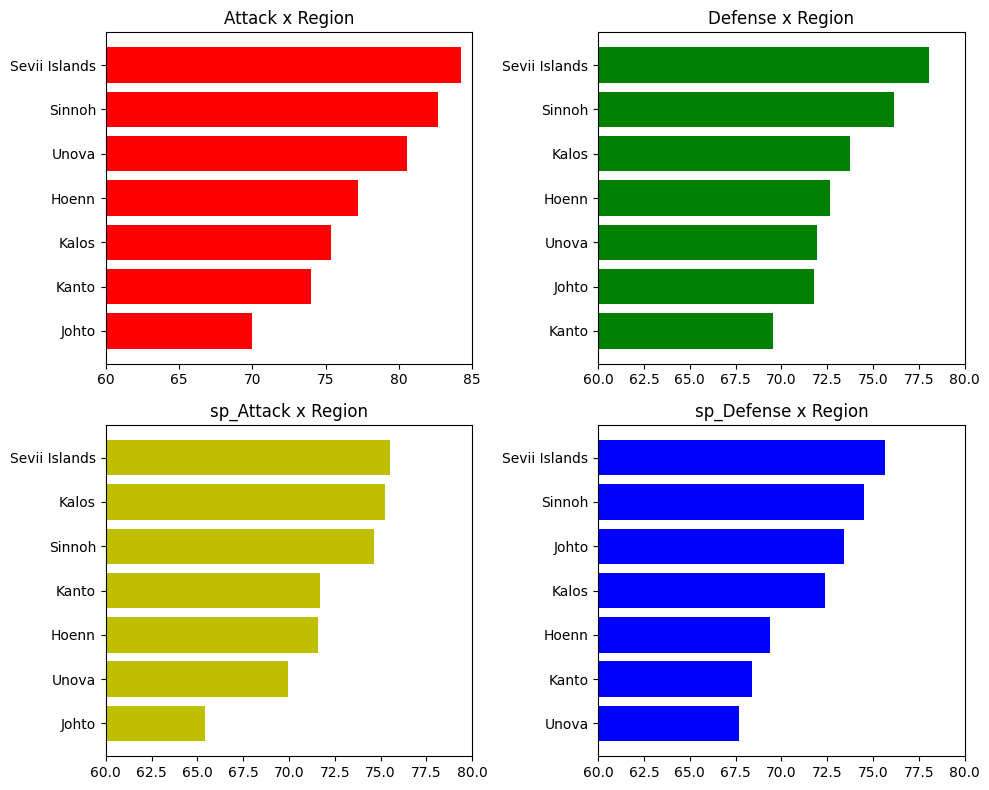

In [138]:
fig, ax = plt.subplots(2,2, figsize = (10, 8))


colunas_combate = ['attack',	'defense','sp_attack', 'sp_defense']


combate = pokedex.groupby('region')[colunas_combate].mean().sort_values(by = 'attack', ascending = True)
combate.reset_index(inplace = True)
ax[0,0].barh(y = combate['region'], width = combate['attack'], color = 'r')
ax[0,0].set_xlim(60,85)
ax[0,0].set_title("Attack x Region")


combate = pokedex.groupby('region')[colunas_combate].mean().sort_values(by = 'defense', ascending = True)
combate.reset_index(inplace = True)
ax[0,1].barh(y = combate['region'], width = combate['defense'], color = 'g')
ax[0,1].set_xlim(60,80)
ax[0,1].set_title("Defense x Region")


combate = pokedex.groupby('region')[colunas_combate].mean().sort_values(by = 'sp_attack', ascending = True)
combate.reset_index(inplace = True)
ax[1,0].barh(y = combate['region'], width = combate['sp_attack'], color = 'y')
ax[1,0].set_xlim(60,80)
ax[1,0].set_title("sp_Attack x Region")


combate = pokedex.groupby('region')[colunas_combate].mean().sort_values(by = 'sp_defense', ascending = True)
combate.reset_index(inplace = True)
ax[1,1].barh(y = combate['region'], width = combate['sp_defense'], color = 'b')
ax[1,1].set_xlim(60,80)
ax[1,1].set_title("sp_Defense x Region")

plt.tight_layout()
plt.show()

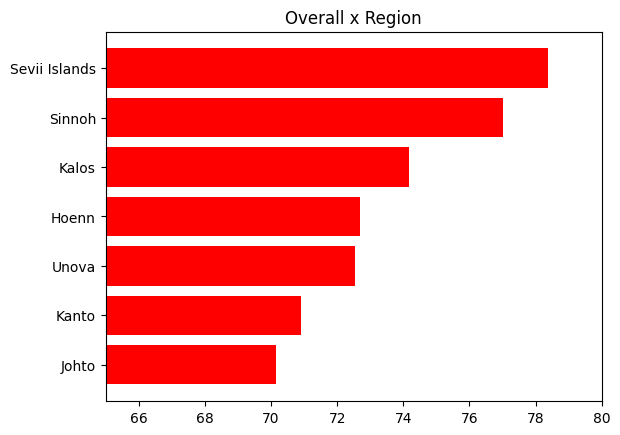

In [139]:
combate = pokedex.groupby('region')['overall'].mean().sort_values(ascending = True).reset_index()

plt.barh(y = combate['region'], width = combate['overall'], color = 'r')
plt.xlim(65, 80)
plt.title("Overall x Region");

#### *Entender em quanto a presença de pokemon lendários na região influencia diretamente no overall da temporada*




In [140]:
pokedex_normal = pokedex.loc[pokedex['is_legendary'] == False]

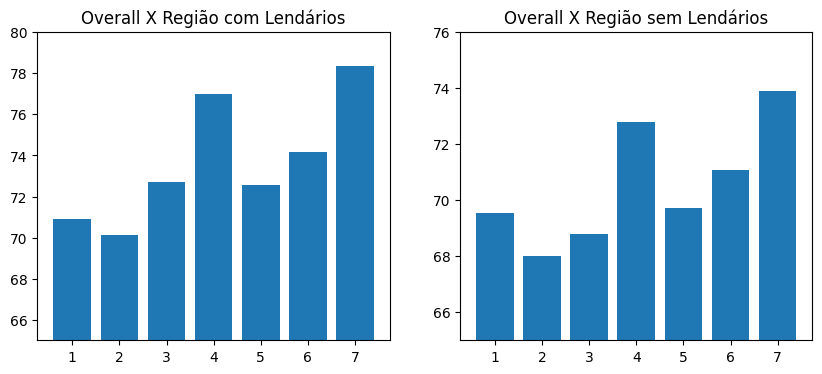

In [141]:
colunas = ['overall', 'generation']
combate_normal = pokedex_normal.groupby('region')[colunas].mean().sort_values(by='generation', ascending=True).reset_index()
combate = pokedex.groupby('region')[colunas].mean().sort_values(by='generation', ascending=True).reset_index()

fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].bar(combate['generation'], combate_total['overall'])
ax[0].set_ylim(65, 80)
ax[0].set_title('Overall X Região com Lendários')


ax[1].bar(combate_normal['generation'], combate_normal['overall'])
ax[1].set_ylim(65, 76)
ax[1].set_title('Overall X Região sem Lendários');

In [142]:
combate_normal.rename(columns={'overall': 'overall_normal'}, inplace=True)

combate_comparativo = pd.merge(combate, combate_normal, on = 'region')
combate_comparativo.drop(columns = 'generation_y', inplace = True)

combate_comparativo['dif_numerica'] = combate_comparativo['overall_normal']-combate_comparativo['overall']
combate_comparativo['dif_percentual'] = (1-(combate_comparativo['overall']/combate_comparativo['overall_normal']))*100

média_num = combate_comparativo['dif_numerica'].mean()
média_pecent = combate_comparativo['dif_percentual'].mean()

display('Foi concluído que a falta de Pokémon lendários resultou em uma diminuição média de %.1f no valor do overall.' % média_num)
display('Foi concluído que a falta de Pokémon lendários resultou em uma diminuição percentual média de %.1f porcento no valor do overall.' % média_pecent)


'Foi concluído que a falta de Pokémon lendários resultou em uma diminuição média de -3.1 no valor do overall.'

'Foi concluído que a falta de Pokémon lendários resultou em uma diminuição percentual média de -4.4 porcento no valor do overall.'

conclui-se que a presença dos lendários não altera o resultado final do ranking das regiões com pokemons mais fortes, porém, altera o valor geral do overall da região


### separado por tipo de pokemon

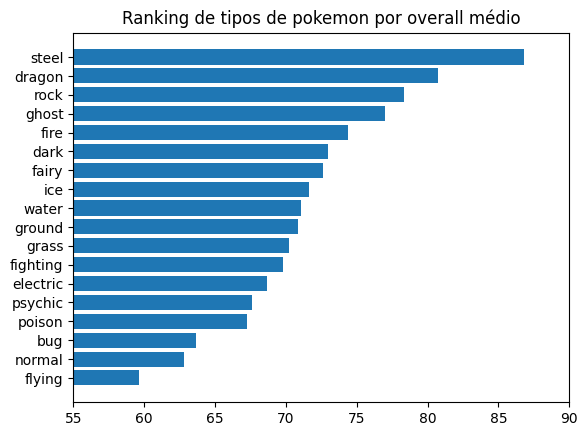

In [146]:
combate_tipo = pokedex_normal.groupby('type')['overall'].mean().sort_values(ascending = True).reset_index()

plt.barh(y = combate_tipo['type'], width = combate_tipo['overall'])
plt.title("Ranking de tipos de pokemon por overall médio")
plt.xlim(55,90);

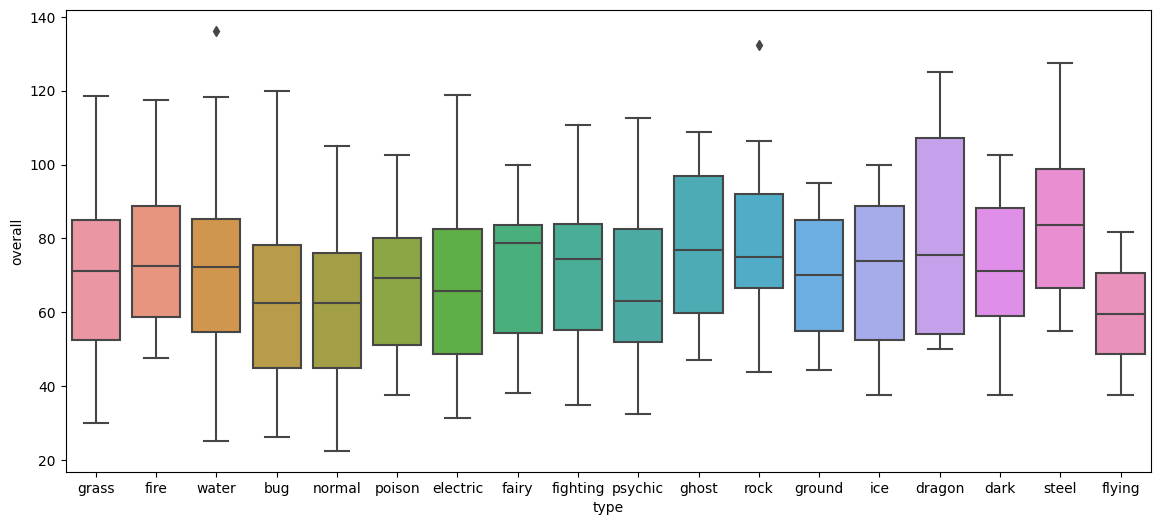

In [156]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='type', y='overall', data=pokedex_normal);